# Income Prediction

**Authors:** Daniel Davidík, Michael Slavev

**Data:** https://www.kaggle.com/datasets/lodetomasi1995/income-classification/
       
The goal of this project is to predict whether a person makes over $50K a year.

Attribute **income** is our target variable and other attributes are utilized for prediction.

In [1]:
#import sys
#!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Rest
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# Read data
df = pd.read_csv('income_evaluation.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 1. Exploratory Data Analysis
##### The data file consist of 15 columns and 32561 entries

In [3]:
print("Dataset shape: ", df.shape)

Dataset shape:  (32561, 15)


##### Information about the dataset 
Such as the number of non-null values and the data types of each feature.
There you can see that every column following age has whitespace and contains dashes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Dataset summary

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Check for missing data
The dataset does not contain any missing values.

In [6]:
missingPd = pd.DataFrame()
missingPd["isNull"] = df.isnull().any()
missingPd["isNan"] = df.isna().any()

missingPd

,isNull,isNan
age,False,False
workclass,False,False
fnlwgt,False,False
education,False,False
education-num,False,False
marital-status,False,False
occupation,False,False
relationship,False,False
race,False,False
sex,False,False


##### Check for duplicate data
The dataset does contain duplicates.

In [7]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  24


Cleaning up column names

In [8]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Some data vizualization

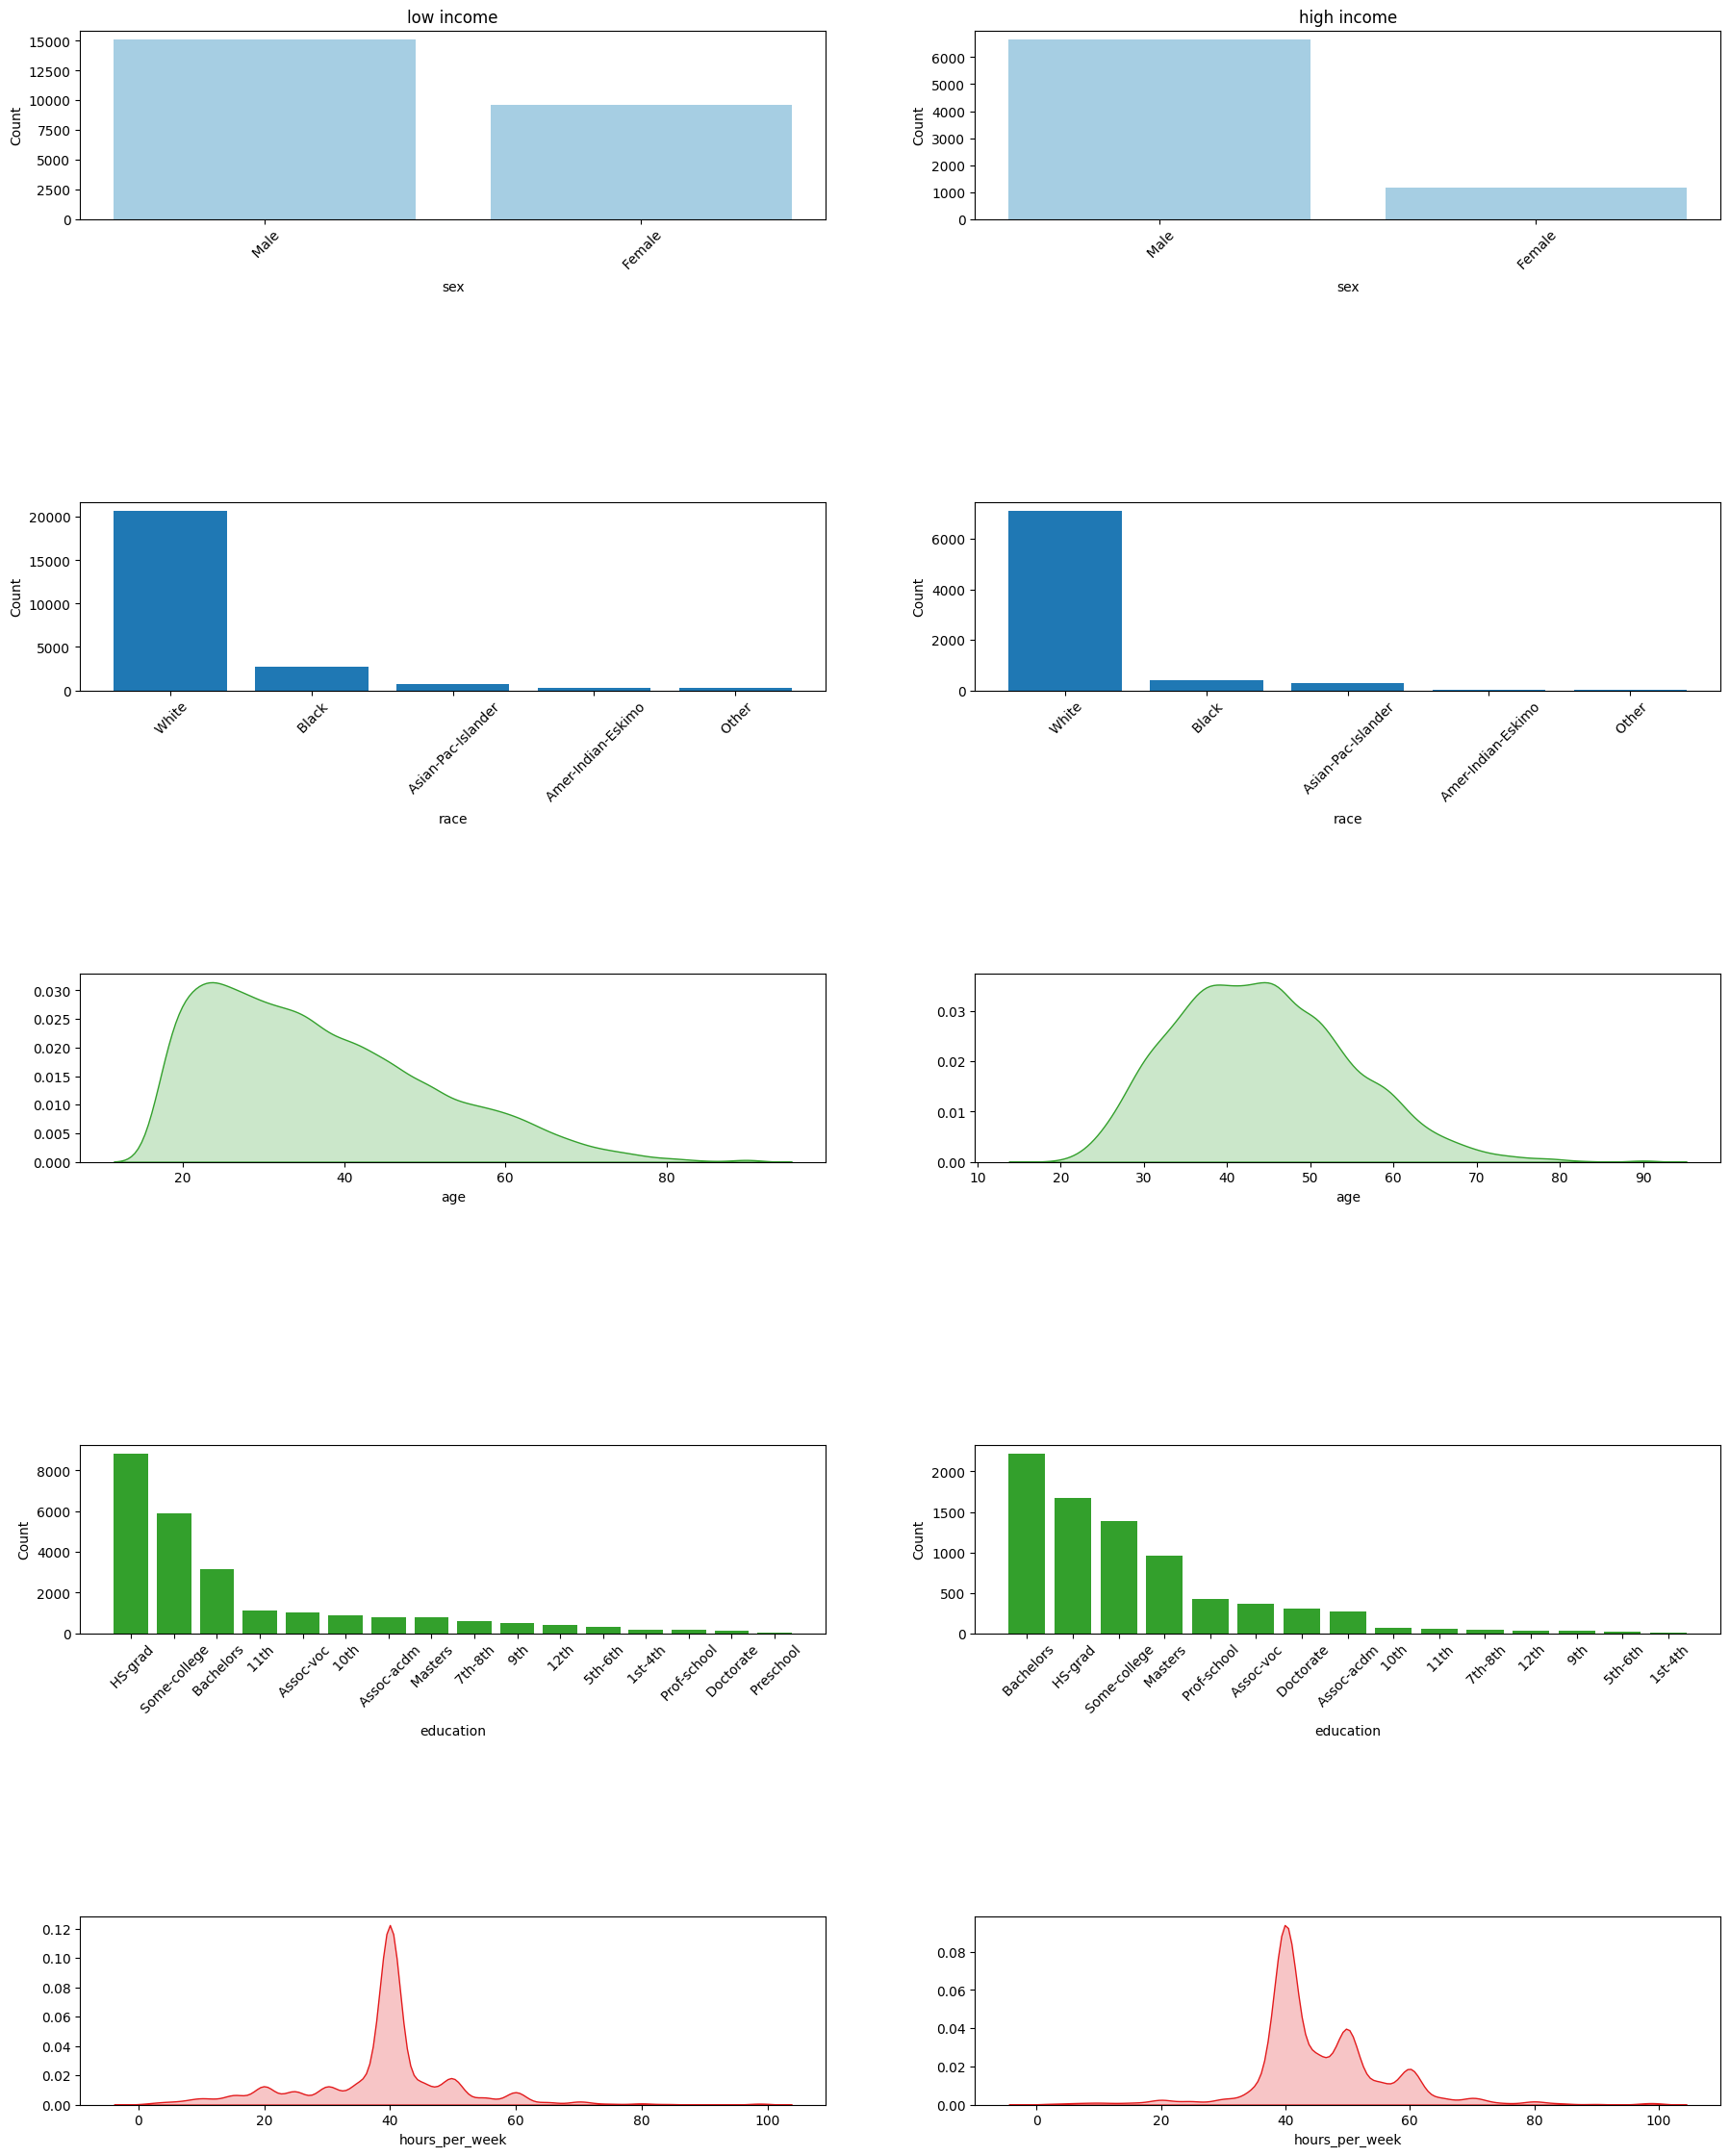

In [9]:
cols = ['low income', 'high income']
interested_vars = ['sex', 'race', 'age', 'education', 'hours_per_week']

colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=len(interested_vars), ncols=2, figsize=(22, 28))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=1.5)


for i, var in enumerate(interested_vars):
    if df[var].dtype == 'O':
        # Count plots for categorical variables
        low_income_counts = df.loc[df['income'] == ' <=50K'][var].value_counts()
        high_income_counts = df.loc[df['income'] == ' >50K'][var].value_counts()

        ax[i, 0].bar(low_income_counts.index, low_income_counts, label='<=50K', color=colors[i])
        ax[i, 1].bar(high_income_counts.index, high_income_counts, label='>50K', color=colors[i])

        ax[i, 0].set_xlabel(var)
        ax[i, 1].set_xlabel(var)
        ax[i, 0].set_ylabel('Count')
        ax[i, 1].set_ylabel('Count')

        ax[i, 0].tick_params(axis='x', rotation=45)
        ax[i, 1].tick_params(axis='x', rotation=45)

    else:  
        # Count plots for numerical variables variables using KDE
        sns.kdeplot(x=df.loc[df['income'] == ' <=50K'][var],
                    shade=True, color=colors[i + 1], ax=ax[i, 0]).set(ylabel='', xlabel=var)

        sns.kdeplot(x=df.loc[df['income'] == ' >50K'][var],
                    shade=True, color=colors[i + 1], ax=ax[i, 1]).set(ylabel='', xlabel=var)

for ax, col in zip(ax[0], cols):
    ax.set_title(col, fontdict={'fontsize': 12})

plt.show()

## 2. Data preprocessing

##### Remove the duplicate tuples

In [10]:
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates: ", df.shape)

Dataset shape after removing duplicates:  (32537, 15)


Removing unnecessary columns.
- fnlwgt
- education_num

In [11]:
df.drop('fnlwgt', axis=1,inplace=True)
df.drop('education_num', axis=1,inplace=True)

##### Remove whitespaces from string type columns

In [12]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

##### Turn target income attribute into numerical data

In [13]:
 df['income'].replace(['<=50K','>50K'],[0,1],inplace=True)

##### Aggregate age into buckets 10 years long

In [14]:
# Define bins and labels
age_bins = range(0, 111, 10)
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]

# Create a new column with age buckets, drop age column
df['age_bucket'] = pd.cut(df['age'], bins=age_bins, labels=labels, right=False)
df.drop('age', axis=1,inplace=True)
df

,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bucket
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,30-39
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,50-59
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,30-39
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,50-59
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,20-29
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,40-49
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,50-59
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,20-29
